# Exercise

Save this work in your anomaly-detection-exercises repository in a file named discrete_anomaly_detection.ipynb.

Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env

In [2]:
# function to deal with parsing one entry in our log data
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/logs'   
df = pd.read_sql('SELECT * FROM api_access', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.head()


,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [11]:
df.timestamp = pd.to_datetime(df.timestamp)
df['size_mb'] = df['size'] / 1024 / 1024

In [12]:
ips = df.groupby('ip')

In [13]:
def probability(df, n=20):
    for col in df.columns:
        if len(df[col].value_counts()) < n:
            print(col)
            counts = pd.DataFrame(df[col].value_counts())
            probability = df[col].value_counts(normalize=True)
            counts['probability'] = probability
            print(counts)
            normalize=True
            print('- - - - - - - - - - - - - - - - - - - - - ')

In [14]:
probability(df)

ip
                   ip  probability
97.105.19.58    11998     0.858595
173.173.113.51   1059     0.075784
72.181.113.170    613     0.043867
72.181.105.81     246     0.017604
24.26.242.9        21     0.001503
68.201.219.223     21     0.001503
70.121.214.34       2     0.000143
52.87.230.102       2     0.000143
35.175.171.137      2     0.000143
54.145.52.184       1     0.000072
3.92.201.136        1     0.000072
35.174.209.2        1     0.000072
34.229.70.250       1     0.000072
54.172.14.223       1     0.000072
34.207.64.242       1     0.000072
3.88.129.158        1     0.000072
52.91.30.150        1     0.000072
52.90.165.200       1     0.000072
45.23.250.16        1     0.000072
- - - - - - - - - - - - - - - - - - - - - 
request_method
     request_method  probability
GET           13974          1.0
- - - - - - - - - - - - - - - - - - - - - 
http_version
          http_version  probability
HTTP/1.1         13974          1.0
- - - - - - - - - - - - - - - - - - - - - 
st

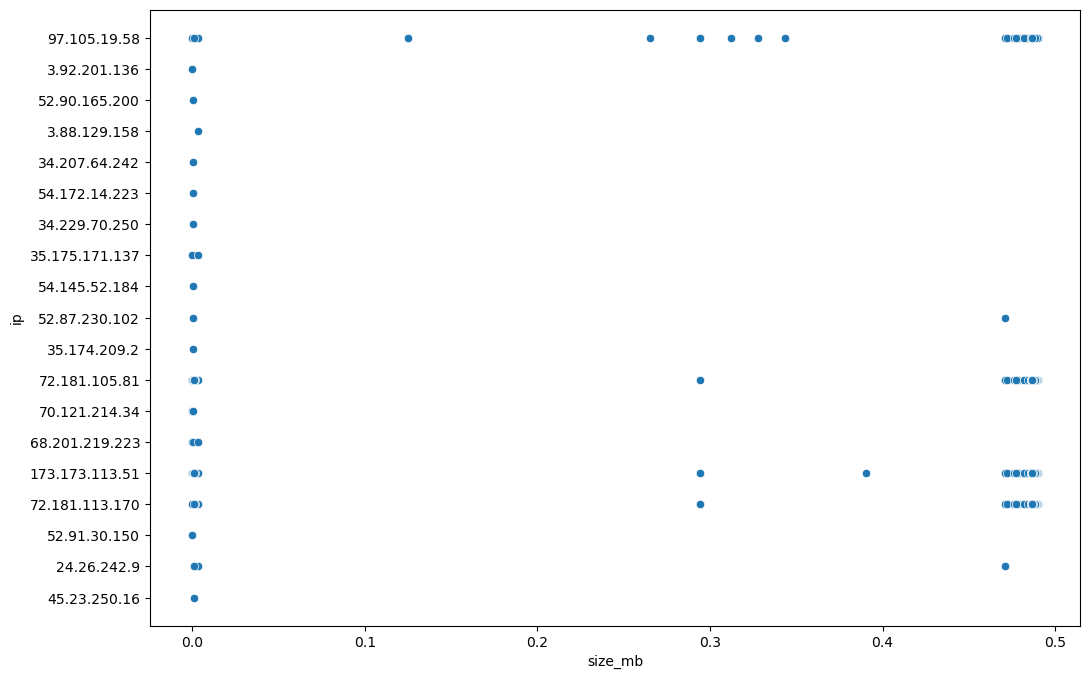

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df.ip, x=df.size_mb)
plt.show()